# __6.1 Simple Linear Regression MtCars Dataset__

In [385]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression

In [386]:
df = pd.read_csv('mtcars.csv')
df.head(2)

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.9,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.9,2.875,17.02,0,1,4,4


In [387]:
df.shape

(32, 12)

In [388]:
df.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


In [389]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   model   32 non-null     object 
 1   mpg     32 non-null     float64
 2   cyl     32 non-null     int64  
 3   disp    32 non-null     float64
 4   hp      32 non-null     int64  
 5   drat    32 non-null     float64
 6   wt      32 non-null     float64
 7   qsec    32 non-null     float64
 8   vs      32 non-null     int64  
 9   am      32 non-null     int64  
 10  gear    32 non-null     int64  
 11  carb    32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


# Check for missing data

In [390]:
df.isnull().sum()

model    0
mpg      0
cyl      0
disp     0
hp       0
drat     0
wt       0
qsec     0
vs       0
am       0
gear     0
carb     0
dtype: int64

### __Problem Statement:__ Predict Milage per gallon using other variables

#### step 1:

Remove car names as there is no need for that data

In [391]:
df = df.iloc[:, 1:]
df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


#### Step 2: Check for linearity

Check correlation between the predictors and target

In [392]:
df.corr() # this gives correlation of each field with the other fields.

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.000000,-0.852162,-0.847551,-0.776168,0.681172,-0.867659,0.418684,0.664039,0.599832,0.480285,-0.550925
cyl,-0.852162,1.000000,0.902033,0.832447,-0.699938,0.782496,-0.591242,-0.810812,-0.522607,-0.492687,0.526988
disp,-0.847551,0.902033,1.000000,0.790949,-0.710214,0.887980,-0.433698,-0.710416,-0.591227,-0.555569,0.394977
hp,-0.776168,0.832447,0.790949,1.000000,-0.448759,0.658748,-0.708223,-0.723097,-0.243204,-0.125704,0.749812
drat,0.681172,-0.699938,-0.710214,-0.448759,1.000000,-0.712441,0.091205,0.440278,0.712711,0.699610,-0.090790
wt,-0.867659,0.782496,0.887980,0.658748,-0.712441,1.000000,-0.174716,-0.554916,-0.692495,-0.583287,0.427606
qsec,0.418684,-0.591242,-0.433698,-0.708223,0.091205,-0.174716,1.000000,0.744535,-0.229861,-0.212682,-0.656249
vs,0.664039,-0.810812,-0.710416,-0.723097,0.440278,-0.554916,0.744535,1.000000,0.168345,0.206023,-0.569607
am,0.599832,-0.522607,-0.591227,-0.243204,0.712711,-0.692495,-0.229861,0.168345,1.000000,0.794059,0.057534
gear,0.480285,-0.492687,-0.555569,-0.125704,0.699610,-0.583287,-0.212682,0.206023,0.794059,1.000000,0.274073


In [393]:
df.corr().mpg

mpg     1.000000
cyl    -0.852162
disp   -0.847551
hp     -0.776168
drat    0.681172
wt     -0.867659
qsec    0.418684
vs      0.664039
am      0.599832
gear    0.480285
carb   -0.550925
Name: mpg, dtype: float64

the usual rule is anything above |0.5|

but here almost all the columns are highly correlated so we shall select only the ones that are |0.7| and above

In [394]:
df_linear = df.loc[:,['cyl','disp','hp','wt','mpg']]
df_linear.head()

,cyl,disp,hp,wt,mpg
0,6,160.0,110,2.620,21.0
1,6,160.0,110,2.875,21.0
2,4,108.0,93,2.320,22.8
3,6,258.0,110,3.215,21.4
4,8,360.0,175,3.440,18.7


In [395]:
df_linear.corr().mpg

cyl    -0.852162
disp   -0.847551
hp     -0.776168
wt     -0.867659
mpg     1.000000
Name: mpg, dtype: float64

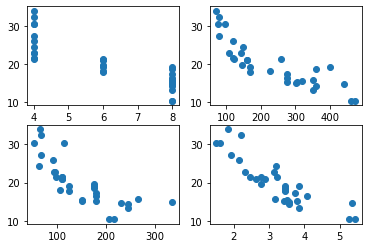

In [396]:
fig, ax = plt.subplots(2,2)

ax[0,0].scatter(x=df_linear.cyl, y=df_linear.mpg, label=['cyl','mpg'])
ax[0,1].scatter(x=df_linear.disp, y=df_linear.mpg, label=['disp','mpg'])
ax[1,0].scatter(x=df_linear.hp, y=df_linear.mpg, label=['hp','mpg'])
ax[1,1].scatter(x=df_linear.wt, y=df_linear.mpg, label=['wt','mpg'])

plt.show()

#### Step 3: Check for multivariate normality

In [397]:
for i in df_linear:
    print(i,' Skewnes is :',stats.skew(df_linear[i]),' and kurtosis ',stats.kurtosis(df_linear[i]))

cyl  Skewnes is : -0.18312865234479678  and kurtosis  -1.6809684168130405
disp  Skewnes is : 0.40027244847286664  and kurtosis  -1.0896826570135087
hp  Skewnes is : 0.7614356361333623  and kurtosis  0.05223272840399584
wt  Skewnes is : 0.44378553550607647  and kurtosis  0.1724705401587352
mpg  Skewnes is : 0.6404398640318834  and kurtosis  -0.20053320971549793


<AxesSubplot:xlabel='wt', ylabel='Density'>

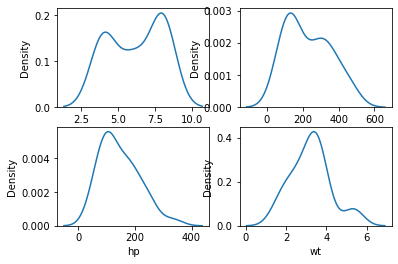

In [398]:
fig, axs = plt.subplots(2,2)

sns.kdeplot(x = df_linear.cyl, ax=axs[0,0])
sns.kdeplot(x = df_linear.disp, ax=axs[0,1])
sns.kdeplot(x = df_linear.hp, ax=axs[1,0])
sns.kdeplot(x = df_linear.wt, ax=axs[1,1])

#### Normality test results
1. cyl column fails the normality test
2. disp barely qualifies for the normality test
3. weight qualifies for the normality test
4. hp also qualifies for the normality test

In [399]:
df_normal = df_linear.iloc[:, 1:]
df_normal.head()

,disp,hp,wt,mpg
0,160.0,110,2.620,21.0
1,160.0,110,2.875,21.0
2,108.0,93,2.320,22.8
3,258.0,110,3.215,21.4
4,360.0,175,3.440,18.7


#### Step 4: Check for colinearity

In [400]:
df_normal.iloc[:,:-1].corr()

,disp,hp,wt
disp,1.000000,0.790949,0.887980
hp,0.790949,1.000000,0.658748
wt,0.887980,0.658748,1.000000


<AxesSubplot:>

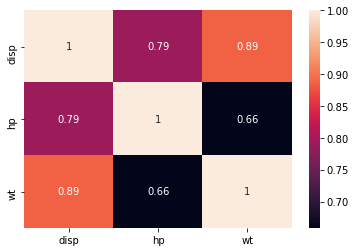

In [401]:
corr = df_normal.iloc[:,:-1].corr()
sns.heatmap(corr, annot=True) # annot = True would show the corr value in the heat map

#### __the darker the heatmap area the lesser the correlation__

In [402]:
df_normal.corr()

,disp,hp,wt,mpg
disp,1.000000,0.790949,0.887980,-0.847551
hp,0.790949,1.000000,0.658748,-0.776168
wt,0.887980,0.658748,1.000000,-0.867659
mpg,-0.847551,-0.776168,-0.867659,1.000000


#### __here we are gonna keep weight and remove disp as disp has lower corr with mpg as compared to wt__

_Explanation:_ Here we have two variables with lesser corr as compared to hp and they are disp and wt 
Now to select one out of the two we check their corr with our target and the one with lesser corr with the target is removed

In [403]:
df_corr = df_normal.iloc[:,1:]
df_corr.head()

,hp,wt,mpg
0,110,2.620,21.0
1,110,2.875,21.0
2,93,2.320,22.8
3,110,3.215,21.4
4,175,3.440,18.7


#### __Step 5:__ Building an ML model 

#### Steps for Building ML model

1. Separate the predictors and targets
2. Separate train and test data
3. Train the ML model
4. Evaluate the model

#### __1. Split Predictors and Targets__

In [404]:
# predictor
X = df_corr.iloc[:,:-1]

# target
y = df_corr.mpg

#### __2. Train Test Split__

In [405]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=14)

In [406]:
X_train.shape

(25, 2)

In [407]:
X_test.shape

(7, 2)

In [408]:
y_train.shape

(25,)

In [409]:
y_test.shape

(7,)

#### __3. Train the model__

In [410]:
# initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)
print('Model trained successfully!')

Model trained successfully!


#### __4. Evaluate__

In [411]:
# model.predict(X_test, y_test)

##### To evaluate a model we use the r-squared value

1. r-squared is between -infinity to 1
2. anything close to 1 is a perfect model

In [412]:
from sklearn.metrics import r2_score

y_predict = model.predict(X_test)
y_predict

array([24.70597747, 20.57455469, 26.88320068, 27.26781514, 21.06426477,
       16.39760929, 22.24545319])

In [413]:
y_test

2     22.8
29    19.7
27    30.4
19    33.9
3     21.4
28    15.8
1     21.0
Name: mpg, dtype: float64

In [414]:
r2_score(y_test, y_predict)

0.7391162461269318

# so we can safely say that model is 74% accurate

# lets try and predict mpg for a car whose weight is 1.5 and hp is 200


In [415]:
hp = 200
wt = 1.5
model.predict([[hp, wt]])

array([24.20368803])

# So now we can say that we are 74% sure that this new car has mpg of around 24.2 mpg

Here one can try and remove the random_state kwarg and see that the model r2_score fluctuates heavily 

This happens with us as we do not have good number of data points to work with. 

We have only 32 data points out of which we take 25 of them to train our model and hence the heavy r2_score fluctuation

Also, This model is no good due to the above reason - r2_score fluctuates due to less number of data points

# Outlier Removal

1. Z score detection
    - convert all values in their corresponding z-scores
    - we take only those values whose z-score is range |3-std_dev|

## Z-Score detection

Here we need to convert all of our values into their corresponding z scores

here we need to remove outliers from our predictors

In [416]:
stats.zscore(df_corr.hp)

array([-0.54365487, -0.54365487, -0.7955699 , -0.54365487,  0.41954967,
       -0.61774753,  1.45684686, -1.25494437, -0.76593284, -0.35101396,
       -0.35101396,  0.49364233,  0.49364233,  0.49364233,  0.86410561,
        1.01229092,  1.23456889, -1.19567025, -1.40312969, -1.21048878,
       -0.73629578,  0.04908639,  0.04908639,  1.45684686,  0.41954967,
       -1.19567025, -0.82520696, -0.49919927,  1.73839896,  0.41954967,
        2.79051468, -0.5584734 ])

In [417]:
hp_zscore = stats.zscore(df_corr.hp)

In [418]:
hp_zscore

array([-0.54365487, -0.54365487, -0.7955699 , -0.54365487,  0.41954967,
       -0.61774753,  1.45684686, -1.25494437, -0.76593284, -0.35101396,
       -0.35101396,  0.49364233,  0.49364233,  0.49364233,  0.86410561,
        1.01229092,  1.23456889, -1.19567025, -1.40312969, -1.21048878,
       -0.73629578,  0.04908639,  0.04908639,  1.45684686,  0.41954967,
       -1.19567025, -0.82520696, -0.49919927,  1.73839896,  0.41954967,
        2.79051468, -0.5584734 ])

for a certain value we shall use np.abs() method to get their absolute values

In [419]:
np.abs(hp_zscore)

array([0.54365487, 0.54365487, 0.7955699 , 0.54365487, 0.41954967,
       0.61774753, 1.45684686, 1.25494437, 0.76593284, 0.35101396,
       0.35101396, 0.49364233, 0.49364233, 0.49364233, 0.86410561,
       1.01229092, 1.23456889, 1.19567025, 1.40312969, 1.21048878,
       0.73629578, 0.04908639, 0.04908639, 1.45684686, 0.41954967,
       1.19567025, 0.82520696, 0.49919927, 1.73839896, 0.41954967,
       2.79051468, 0.5584734 ])

In [420]:
wt_zscore = stats.zscore(df_corr.wt)

In [421]:
np.abs(wt_zscore)

array([0.62016658, 0.35538219, 0.93167763, 0.00233633, 0.23129695,
       0.25206436, 0.36628508, 0.02829559, 0.06983039, 0.23129695,
       0.23129695, 0.88547016, 0.5324243 , 0.58434281, 2.11074695,
       2.29142336, 2.20939212, 1.05628205, 1.6637286 , 1.43528716,
       0.78111396, 0.31436657, 0.2261051 , 0.64664502, 0.65183687,
       1.33145014, 1.11858426, 1.76964235, 0.04906299, 0.46441106,
       0.36628508, 0.45402735])

_now there are no outliers in the data so if there were and if your data is really big then using
np and pandas we can directly create a data frame for the same as below_

In [422]:
df_z = df_corr[np.abs(hp_zscore) <= 3]

In [423]:
df_z = df_z[np.abs(wt_zscore) <= 3]

In [424]:
df_z.shape

(32, 3)

_Here since we have no outliers our dataframe remains the same but in case of outliers
the size of the data frame will reduce as the outliers i.e. any record with z-score more than 3
will be removed_

In [425]:
mpg_zscore = stats.zscore(df_z.mpg)

In [426]:
df_z = df_z[np.abs(mpg_zscore) <= 3]
df_z.shape
df_z.head()

,hp,wt,mpg
0,110,2.620,21.0
1,110,2.875,21.0
2,93,2.320,22.8
3,110,3.215,21.4
4,175,3.440,18.7


# Box plot
we can use boxplot to check if there are any outliers in our data

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='mpg'>

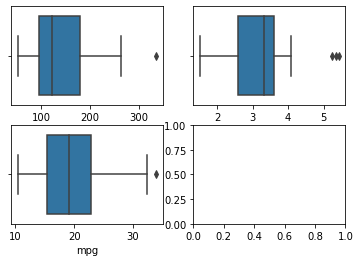

In [427]:
fig, axs = plt.subplots(2,2)

sns.boxplot(df_z.hp, ax=axs[0,0])
sns.boxplot(df_z.wt, ax=axs[0,1])
sns.boxplot(df_z.mpg, ax=axs[1,0])

# Percentile

this is a method that we apply to the box plot or our dataset
to get the outliers

In [428]:
perc99 = df_z.hp.quantile(0.998)

In [429]:
perc99

330.5979999999999

In [430]:
df_z = df_z[df_z.hp <= perc99]
df_z.shape

(31, 3)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hp'>

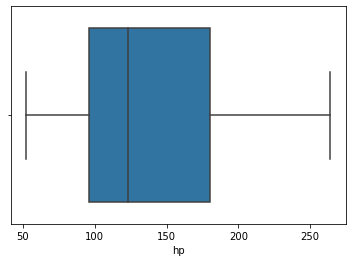

In [431]:
sns.boxplot(df_z.hp)

### now we can see that the one outlier that went undetected in the previous methods has been removed

### now lets apply the same to our weight

In [432]:
perc99_wt = df_z.wt.quantile(0.93)
perc99_wt

5.132000000000002

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='wt'>

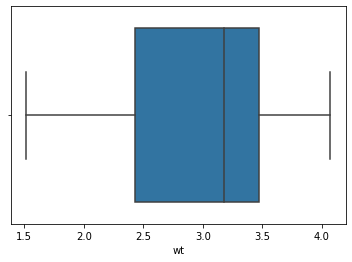

In [433]:
df_z = df_z[df_z.wt <= perc99_wt]
sns.boxplot(df_z.wt)

In [434]:
df_z.shape

(28, 3)

Now lets run linear regression on this again

1. split predictors and target
2. perform a train test split
3. train the model
4. evaluate the model using r2_score

In [435]:
X = df_z.iloc[:,:-1]
y = df_z.mpg

In [436]:
print(X.shape, y.shape)

(28, 2) (28,)


In [437]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)

In [438]:
# now we train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [439]:
#Now we predict the values
y_predict = model.predict(X_test)

In [440]:
r2_score(y_test, y_predict)

0.6190968308544469

Here we have seen here today that our r2 score fluctuates heavily when we change random_state

This is there fore not a good model because we do not have required data

Here we can use K-fold cross validation when we have heavy fluctuation in our r2 score

# Reminder

percentile works on non normal data

z-score works only on normal data